<a href="https://colab.research.google.com/github/GITGENome/foie/blob/main/Etude_maladie_foie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# foie

- Taille : 400 lignes, 26 colonnes
-

In [10]:
nan = ["NaN", "NAN","\t43", "\t", "\t?"]
df_foie = pd.read_csv("https://raw.githubusercontent.com/MaskiVal/DataSets/main/liver_patient.csv", na_values=nan)
pd.set_option("display.max_row", 111)

<Axes: >

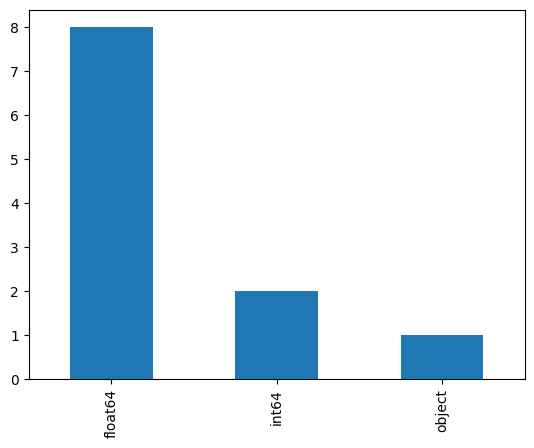

In [11]:
df_foie.dtypes.value_counts().plot.bar()

In [26]:
df_foie.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [27]:
df_foie.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [12]:
df_foie

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,0.7,0.1,187,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60.0,Male,0.5,0.1,500,20.0,34.0,5.9,1.6,0.37,2
579,40.0,Male,0.6,0.1,98,35.0,31.0,6.0,3.2,1.10,1
580,52.0,Male,0.8,0.2,245,48.0,49.0,6.4,3.2,1.00,1
581,31.0,Male,1.3,0.5,184,29.0,32.0,6.8,3.4,1.00,1


In [7]:
for col in df_foie.select_dtypes(object).columns:
  print(df_foie[col].value_counts())
  print('\n')

Male      441
Female    142
Name: Gender, dtype: int64




## Info

In [13]:
df_foie.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,583.000000,583.000000,583.000000,579.000000,576.000000,583.000000,583.000000,579.000000,583.000000
mean,44.758204,3.298799,1.486106,290.576329,80.974093,110.723958,6.483190,3.141852,0.947064,1.286449
std,16.245103,6.209522,2.808498,242.937989,183.224127,290.576935,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.250000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


10












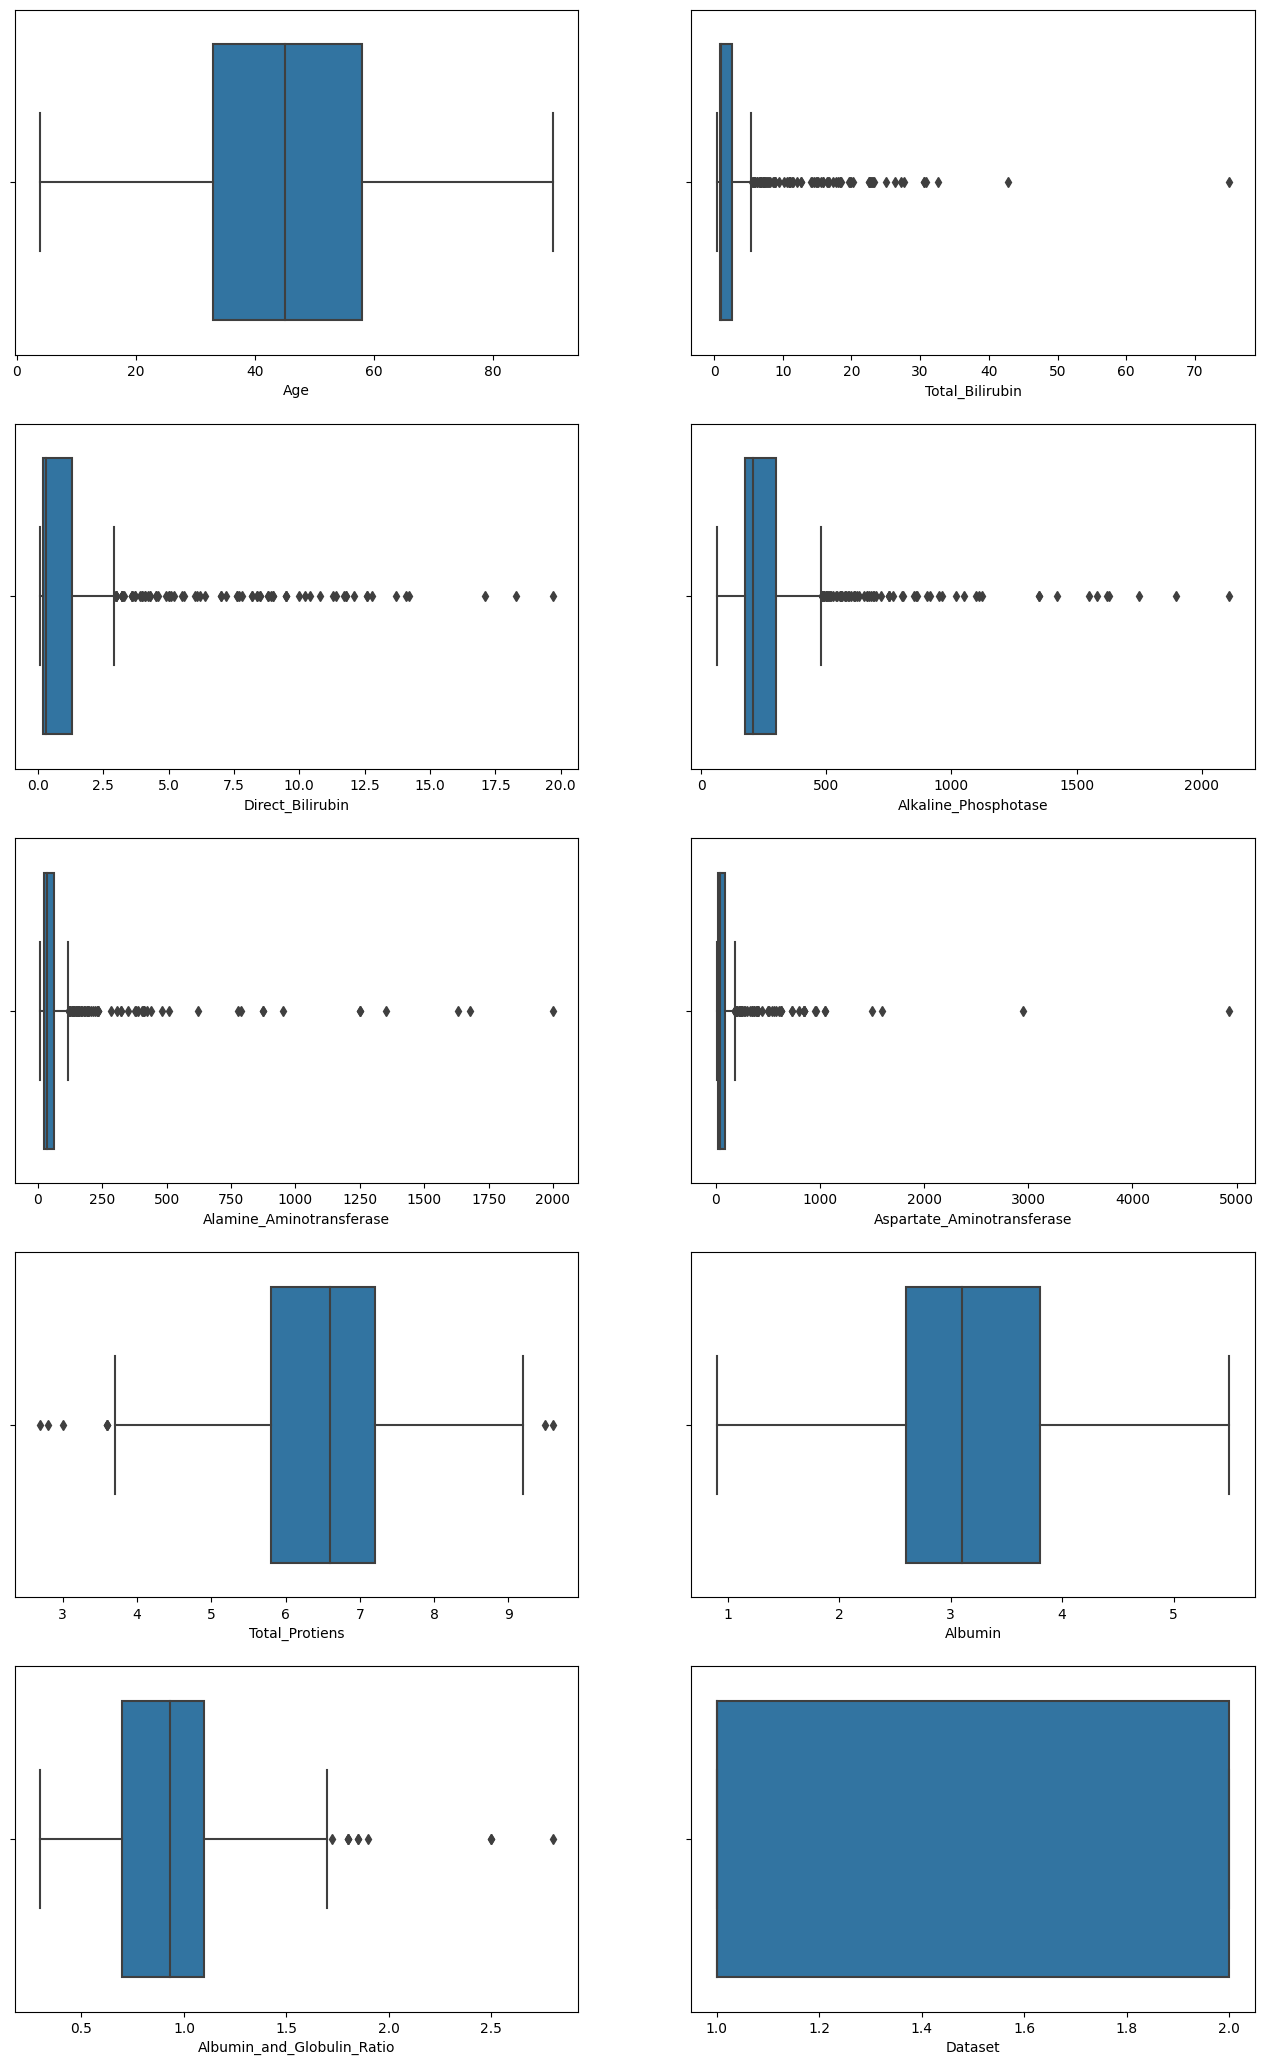

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [19]:
nbre_ligne = 5
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 26))
list_cols = df_foie.select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      plt.figure(figsize = (12,8))
      sns.boxplot(x = df_rein[list_cols[id]], ax=axes[row,col])#.set(title=list_cols[id])
      id += 1
  print("\n")

# for col in df_rein.drop(columns = 'id').select_dtypes([int,float]).columns:
#   plt.figure()
#   sns.boxplot(x = df_rein[col])
#   #plt.title(col)
#   plt.show()
#   print("\n")

10


<ipython-input-33-747c73b80d43>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset']==1], ax=axes[row,col], label = 'positif')
<ipython-input-33-747c73b80d43>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset'

<ipython-input-33-747c73b80d43>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset']==1], ax=axes[row,col], label = 'positif')
<ipython-input-33-747c73b80d43>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset'

<ipython-input-33-747c73b80d43>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset']==2], ax=axes[row,col], label = 'negatif')#.set(title=list_cols[id])
<ipython-input-33-747c73b80d43>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_c

<ipython-input-33-747c73b80d43>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset']==1], ax=axes[row,col], label = 'positif')
<ipython-input-33-747c73b80d43>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset'

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-33-747c73b80d43>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset']==2], ax=axes[row,col], label = 'negatif')#.set(title=list_cols[id])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a

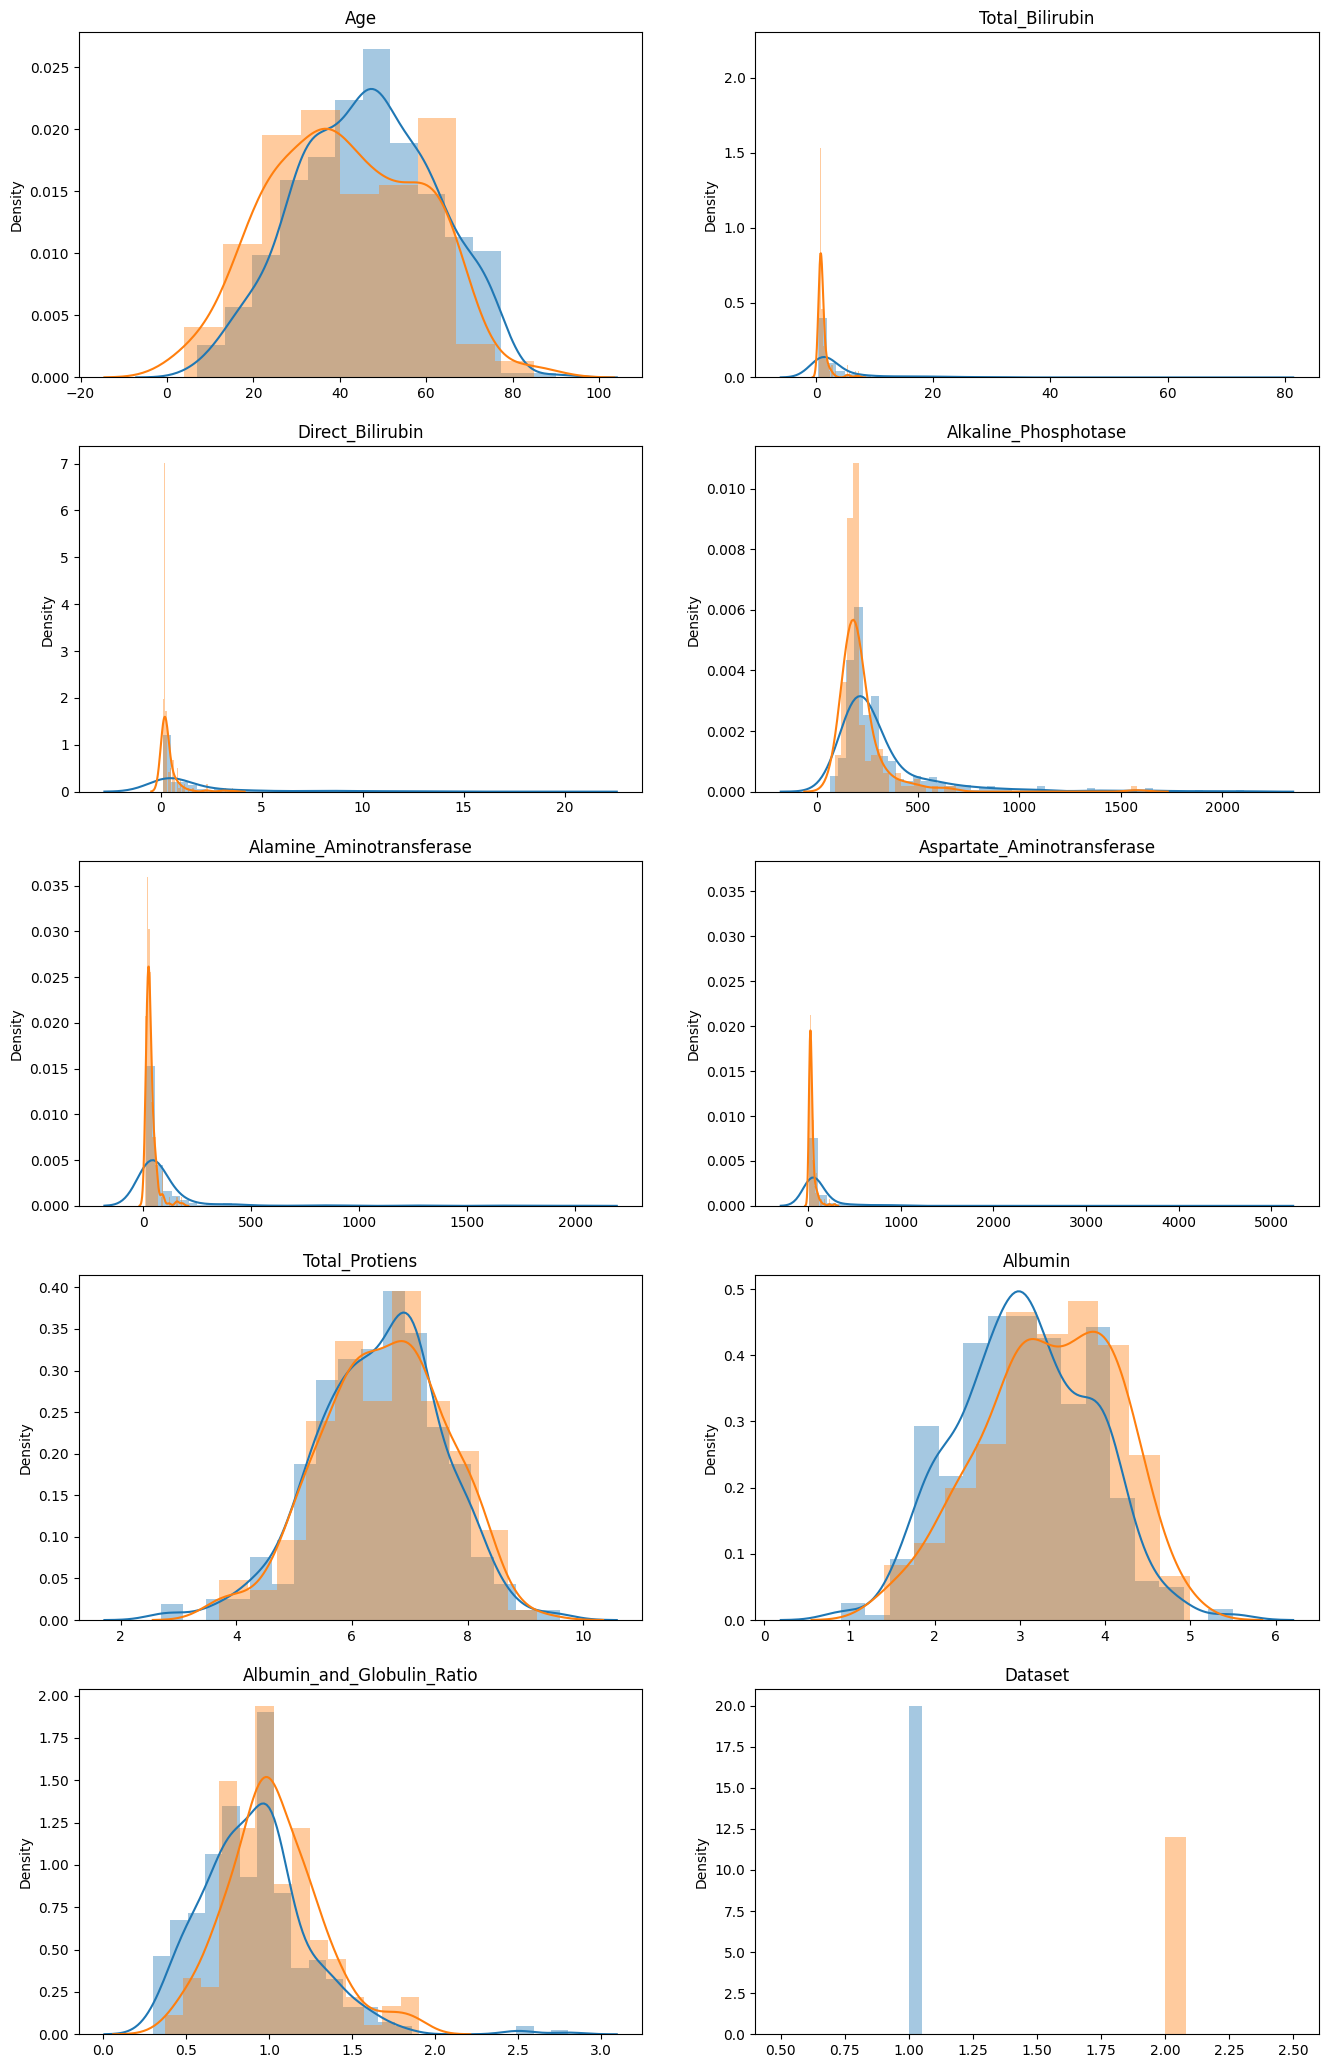

In [33]:
nbre_ligne = 5
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 26))
list_cols = df_foie.select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      #plt.figure(figsize = (12,8))
      sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset']==1], ax=axes[row,col], label = 'positif')
      sns.distplot(x = df_foie[list_cols[id]][df_foie['Dataset']==2], ax=axes[row,col], label = 'negatif')#.set(title=list_cols[id])
      axes[row,col].set_title(list_cols[id])
      id += 1
  print("\n")

- Taux normal de globule rouge chez l'homme :	4,6 à 6,2 x 1012/L	120 à 160 g/L
- Taux normale de globule blanc chez l'homme : Le nombre normal total se situe entre 4 000 et 11 000 cellules par microlitre (4 à 11 x 109 par litre)

> Quelles sont les unités de ces deux mesures ?



In [ ]:
df_rein.select_dtypes([int,float])


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [25]:
df_foie.shape

(583, 11)

## Analyse des valeurs manquantes

<Axes: >

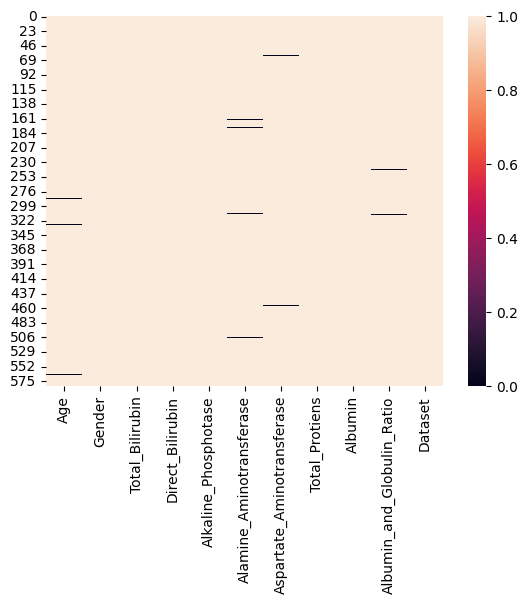

In [24]:
sns.heatmap(df_foie.notna())

<Axes: title={'center': 'Pourcentage de valeur manquantes'}>

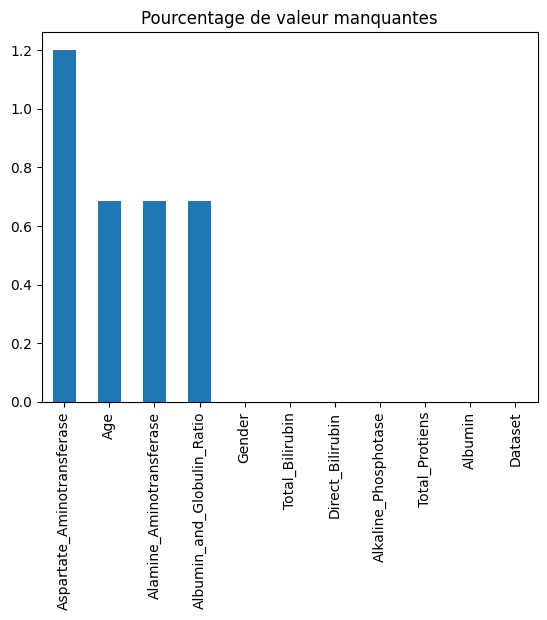

In [23]:
(df_rein.isna().mean().sort_values(ascending=False)*100).plot(kind = "bar", title = "Pourcentage de valeur manquantes")